# Plotting and Visualization

In [64]:
import numpy as np
np.random.seed(12345)
np.set_printoptions(precision=4, suppress=True)

import pandas as pd
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20

import matplotlib.pyplot as plt
import matplotlib
plt.rc('figure', figsize=(10, 6))


In [8]:
np.random.seed?

Docstring:
seed(self, seed=None)

Reseed a legacy MT19937 BitGenerator

Notes
-----
This is a convenience, legacy function.

The best practice is to **not** reseed a BitGenerator, rather to
recreate a new one. This method is here for legacy reasons.
This example demonstrates best practice.

>>> from numpy.random import MT19937
>>> from numpy.random import RandomState, SeedSequence
>>> rs = RandomState(MT19937(SeedSequence(123456789)))
# Later, you want to restart the stream
>>> rs = RandomState(MT19937(SeedSequence(987654321)))
Type:      builtin_function_or_method


In [9]:
PREVIOUS_MAX_ROWS?

Type:        int
String form: 20
Docstring:  
int([x]) -> integer
int(x, base=10) -> integer

Convert a number or string to an integer, or return 0 if no arguments
are given.  If x is a number, return x.__int__().  For floating point
numbers, this truncates towards zero.

If x is not a number or if base is given, then x must be a string,
bytes, or bytearray instance representing an integer literal in the
given base.  The literal can be preceded by '+' or '-' and be surrounded
by whitespace.  The base defaults to 10.  Valid bases are 0 and 2-36.
Base 0 means to interpret the base from the string as an integer literal.
>>> int('0b100', base=0)
4


%matplotlib notebook

## A Brief matplotlib API Primer

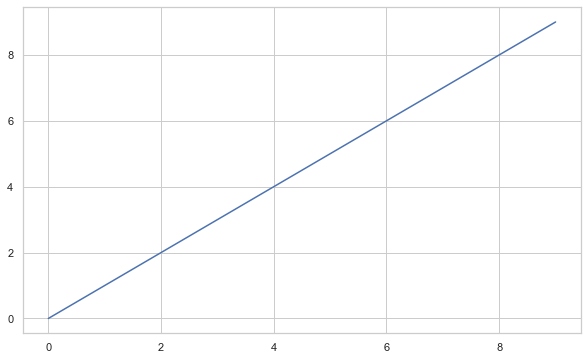

In [65]:
data = np.arange(10)
data
plt.plot(data)

### Figures and Subplots

In [66]:
fig = plt.figure()

<Figure size 720x432 with 0 Axes>

In [68]:
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

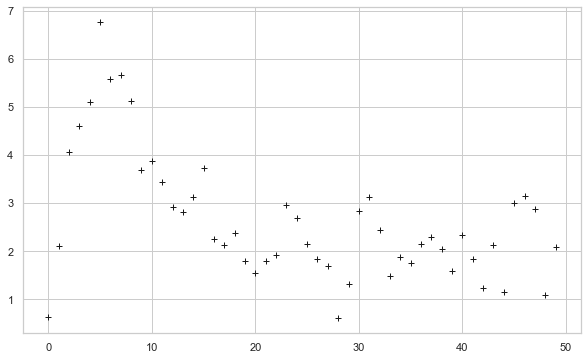

In [80]:
plt.plot(np.random.randn(50).cumsum(), 'k+')

In [74]:
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)

In [75]:
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

In [82]:
plt.close('all')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a27df96d0>,
      dtype=object)

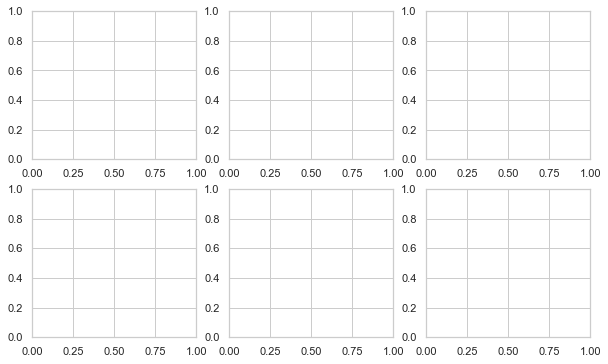

In [83]:
fig, axes = plt.subplots(2, 3)
axes

#### Adjusting the spacing around subplots

subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=None)

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

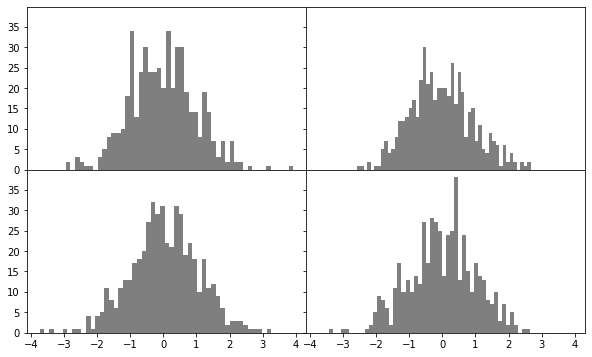

In [19]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

### Colors, Markers, and Line Styles

ax.plot(x, y, 'g--')

ax.plot(x, y, linestyle='--', color='g')

In [20]:
plt.figure()

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

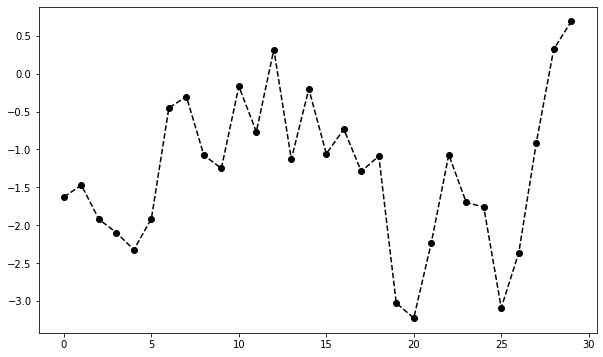

In [21]:
from numpy.random import randn
plt.plot(randn(30).cumsum(), 'ko--')

plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

In [22]:
plt.close('all')

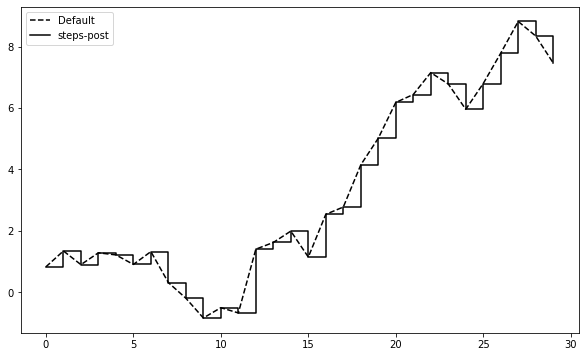

In [23]:
data = np.random.randn(30).cumsum()
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

### Ticks, Labels, and Legends

#### Setting the title, axis labels, ticks, and ticklabels

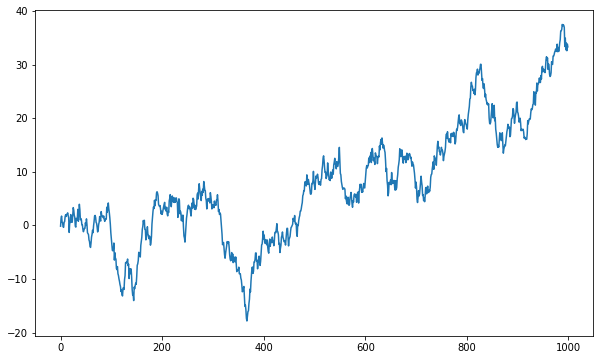

In [24]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

In [25]:
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small')

In [26]:
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')

Text(0.5, 3.200000000000003, 'Stages')

props = {
    'title': 'My first matplotlib plot',
    'xlabel': 'Stages'
}
ax.set(**props)

#### Adding legends

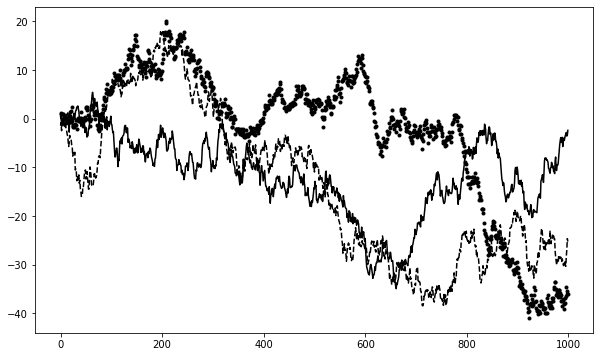

In [27]:
from numpy.random import randn
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')

In [28]:
ax.legend(loc='best')

### Annotations and Drawing on a Subplot

ax.text(x, y, 'Hello world!',
        family='monospace', fontsize=10)

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

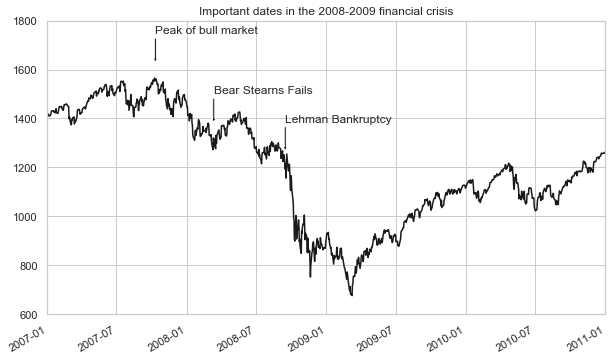

In [81]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('../examples/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='black', headwidth=4, width=2,
                                headlength=4),
                horizontalalignment='left', verticalalignment='top')

# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in the 2008-2009 financial crisis')

In [30]:
ax.set_title('Important dates in the 2008–2009 financial crisis')

Text(0.5, 1, 'Important dates in the 2008–2009 financial crisis')

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

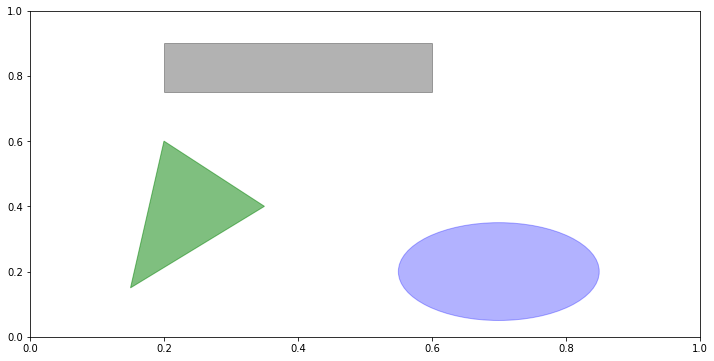

In [31]:
fig = plt.figure(figsize=(12, 6)); ax = fig.add_subplot(1, 1, 1)
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

### Saving Plots to File

plt.savefig('figpath.svg')

plt.savefig('figpath.png', dpi=400, bbox_inches='tight')

from io import BytesIO
buffer = BytesIO()
plt.savefig(buffer)
plot_data = buffer.getvalue()

### matplotlib Configuration

plt.rc('figure', figsize=(10, 10))

font_options = {'family' : 'monospace',
                'weight' : 'bold',
                'size'   : 'small'}
plt.rc('font', **font_options)

## Plotting with pandas and seaborn

### Line Plots

In [32]:
plt.close('all')

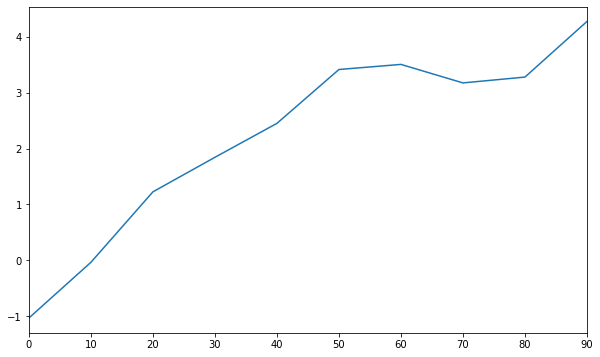

In [33]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

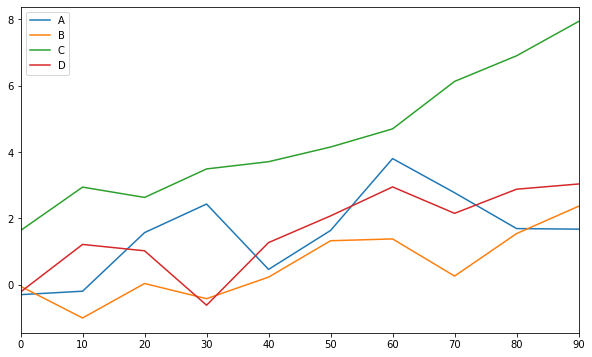

In [34]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))
df.plot()

### Bar Plots

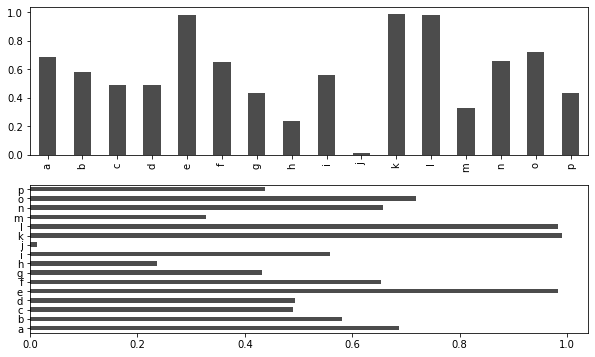

In [35]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

In [36]:
np.random.seed(12348)

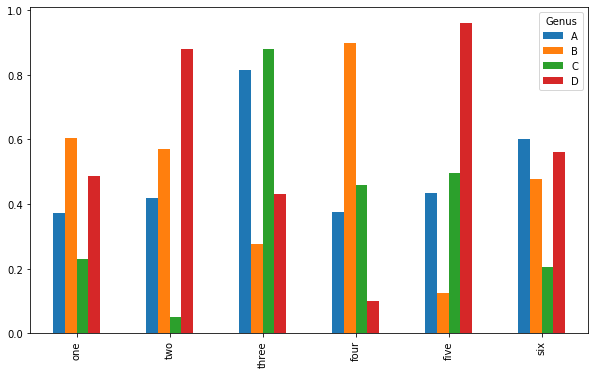

In [37]:
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df
df.plot.bar()

In [38]:
plt.figure()

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

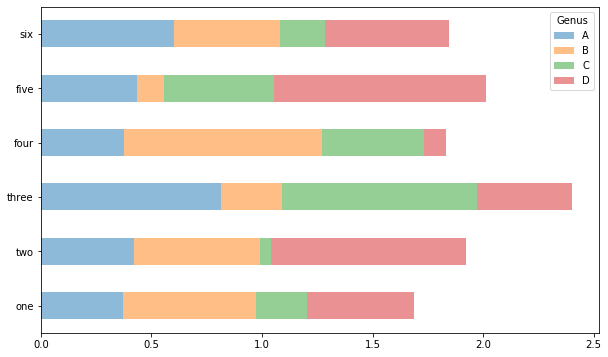

In [39]:
df.plot.barh(stacked=True, alpha=0.5)

In [40]:
plt.close('all')

In [41]:
tips = pd.read_csv('examples/tips.csv')
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts
# Not many 1- and 6-person parties
party_counts = party_counts.loc[:, 2:5]

FileNotFoundError: [Errno 2] File b'examples/tips.csv' does not exist: b'examples/tips.csv'

In [42]:
# Normalize to sum to 1
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
party_pcts
party_pcts.plot.bar()

NameError: name 'party_counts' is not defined

In [43]:
plt.close('all')

In [44]:
import seaborn as sns
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

NameError: name 'tips' is not defined

In [45]:
plt.close('all')

In [46]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

NameError: name 'tips' is not defined

In [47]:
plt.close('all')

In [48]:
sns.set(style="whitegrid")

### Histograms and Density Plots

In [49]:
plt.figure()

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

In [50]:
tips['tip_pct'].plot.hist(bins=50)

NameError: name 'tips' is not defined

In [51]:
plt.figure()

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

In [52]:
tips['tip_pct'].plot.density()

NameError: name 'tips' is not defined

In [53]:
plt.figure()

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

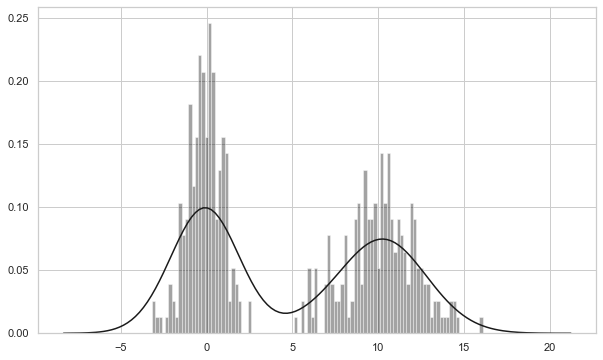

In [54]:
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.distplot(values, bins=100, color='k')

### Scatter or Point Plots

In [55]:
macro = pd.read_csv('examples/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

FileNotFoundError: [Errno 2] File b'examples/macrodata.csv' does not exist: b'examples/macrodata.csv'

In [56]:
plt.figure()

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

In [57]:
sns.regplot('m1', 'unemp', data=trans_data)
plt.title('Changes in log %s versus log %s' % ('m1', 'unemp'))

NameError: name 'trans_data' is not defined

In [58]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})

NameError: name 'trans_data' is not defined

### Facet Grids and Categorical Data

In [59]:
sns.factorplot(x='day', y='tip_pct', hue='time', col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])

NameError: name 'tips' is not defined

In [60]:
sns.factorplot(x='day', y='tip_pct', row='time',
               col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])

NameError: name 'tips' is not defined

In [61]:
sns.factorplot(x='tip_pct', y='day', kind='box',
               data=tips[tips.tip_pct < 0.5])

NameError: name 'tips' is not defined

## Other Python Visualization Tools

In [62]:
pd.options.display.max_rows = PREVIOUS_MAX_ROWS

## Conclusion